In [116]:
import pandas as pd
data = pd.read_csv("iris.data", delimiter=',', header = None)

In [118]:
y = data[4]
x = data.drop(columns=[4])

In [119]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y1 = labelencoder.fit_transform(y)
Y = pd.get_dummies(y1).values

In [120]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , Y , test_size = 0.2 , random_state = 0)

In [121]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [122]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [167]:
model = Sequential()

model.add(Dense(8, input_shape = (4,), activation='relu'))
model.add(Dense(8, activation='relu' ))
model.add(Dense(3,  activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [168]:
output = model.fit(x_train, y_train, batch_size = 5, epochs=20)

Epoch 1/20
24/24 [==============================] - 0s 1ms/step - loss: 0.9120 - accuracy: 0.4833
Epoch 2/20
24/24 [==============================] - 0s 994us/step - loss: 0.8361 - accuracy: 0.6167
Epoch 3/20
24/24 [==============================] - 0s 1ms/step - loss: 0.7772 - accuracy: 0.8333
Epoch 4/20
24/24 [==============================] - 0s 972us/step - loss: 0.7256 - accuracy: 0.8417
Epoch 5/20
24/24 [==============================] - 0s 1ms/step - loss: 0.6773 - accuracy: 0.8417
Epoch 6/20
24/24 [==============================] - 0s 1ms/step - loss: 0.6327 - accuracy: 0.8500
Epoch 7/20
24/24 [==============================] - 0s 1ms/step - loss: 0.5896 - accuracy: 0.8500
Epoch 8/20
24/24 [==============================] - 0s 961us/step - loss: 0.5481 - accuracy: 0.8500
Epoch 9/20
24/24 [==============================] - 0s 972us/step - loss: 0.5081 - accuracy: 0.8500
Epoch 10/20
24/24 [==============================] - 0s 1ms/step - loss: 0.4725 - accuracy: 0.8500
Epoch 11/20

In [169]:
y_pred = model.predict(x_test)
#y_pred = (y_pred > 5)

1/1 [==============================] - 0s 38ms/step


In [170]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test_class, y_pred_class)
accuracy_score(y_test_class, y_pred_class)

0.8333333333333334

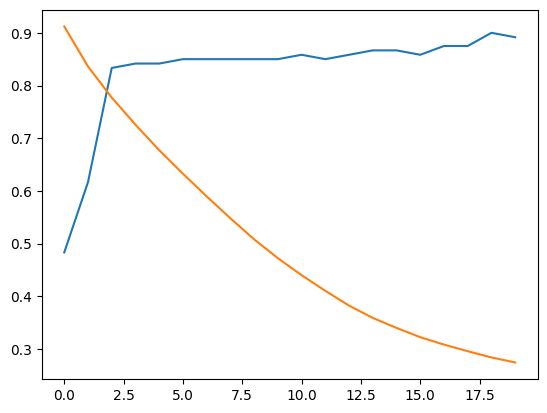

In [171]:
import matplotlib.pyplot as plt
plt.plot(output.history['accuracy'])
plt.plot(output.history['loss'])
plt.show()